### 1. Data Collection

Use Stack Exchange API to download the posts from Stack Overflow (SO) with the following tags: [nlp]
- There will be other tags associated with [nlp]. Consider collecting them too.
- Collect other information such as date/time of the posts, no. of views etc. Generate graphs using popular python libraries to visualise the data.
Your dataset must include the following information in four different columns: 
-	title of the posts (1st column) 
-	description of the posts (2nd column)
-	tags of the posts (3rd column)
-	At least one Accepted answer (4th column)
-	More accepted answers (5th column) (optional)
[Accepted answers are indicated with a green tick symbol in the Stack Overflow site. There is a filter option on Stack Overflow which helps you to see the posts that do not have any accepted answer.]


In [124]:
# pip install requests

In [125]:
import requests
from datetime import datetime
import json
import pandas as pd

question_url = 'https://api.stackexchange.com/2.3/questions'
answer_url = 'https://api.stackexchange.com/2.3/questions/{ids}/answers'
params = {
    'tagged': 'nlp',
    'site': 'stackoverflow',
    'filter': 'withbody',
    'pagesize': 100,
    'sort': 'creation',
    'order': 'desc',
    'key': 'rl_pNMrjMQxT6YzThw14C2FVFbtu'
}

all_posts = []
page = 1

for page in range(2):
    response = requests.get(question_url, params=params)
    data = response.json()
    posts = data.get('items', [])

    if not posts:
        break  # 如果当前页没有帖子，则退出循环
    
    # 提取当前页所有问题的ID
    q_ids = [str(q["question_id"]) for q in posts]
    ids_str = ";".join(q_ids)
    
    # 根据问题ID批量获取对应回答
    answers_response = requests.get(
        answer_url.format(ids=ids_str),
        params=params
    )
    answers_data = answers_response.json()
    answers = answers_data.get("items", [])
    
    # 将回答按 question_id 分组存入字典
    answers_by_question = {}
    for ans in answers:
        qid = ans.get("question_id")
        if qid:
            answers_by_question.setdefault(qid, []).append(ans)
    
    # 将对应回答附加到问题中（存入 'answers' 字段）
    for q in posts:
        q_id = q.get("question_id")
        q["answers"] = answers_by_question.get(q_id, [])

    all_posts.extend(posts)

df = pd.DataFrame(all_posts)
df.to_csv("full_data.csv", index=False)

In [126]:
data = pd.read_csv('/Users/wongpuihang/Desktop/NLP/Assignment 2/dataset.csv')

data

,Unnamed: 0,tags,a_id,q_id,date,link,title,body,view_count,answer,cleaned_text
0,77994129,"['nlp', 'label-studio']",NaN,77994129,1707912001,https://stackoverflow.com/questions/77994129/h...,How can I use label studio to annotate text da...,<p>How can I use label studio to annotate text...,725,NaN,use label studio annotate text datum google co...
1,75709831,"['python', 'deep-learning', 'pytorch', 'nlp', ...",NaN,75709831,1678572297,https://stackoverflow.com/questions/75709831/z...,Zero Accuracy in Sentiment Analysis FFNN Model...,<p>I'm constructing a feedforward neural net (...,125,NaN,zero accuracy sentiment analysis ffnn model py...
2,79485259,"['python', 'nlp', 'spacy']",NaN,79485259,1741138463,https://stackoverflow.com/questions/79485259/s...,Spacy rules matching entities before text,<p>I'm trying to write a spacy parser to extra...,29,NaN,spacy rule match entity text try write spacy p...
3,79501178,"['python', 'nlp', 'large-language-model']",79501337.0,79501178,1741704631,https://stackoverflow.com/questions/79501178/s...,Store images instead of showing in a server,<p>I am running the code found on this <a href...,35,<p>I can't test it but ...</p>\n<p>I checked <...,store image instead show server run code find ...
4,79548202,"['nlp', 'huggingface-transformers', 'pre-train...",79551169.0,79548202,1743499277,https://stackoverflow.com/questions/79548202/g...,GPT-2 and other models from huggingface -100 l...,<p>I understand the -100 label id is used so t...,43,<p>The author of the tutorial you mentioned se...,model huggingface label index training instead...
...,...,...,...,...,...,...,...,...,...,...,...
19995,8168858,"['python', 'nlp', 'svm', 'orange']",8212397.0,8168858,1321540486,https://stackoverflow.com/questions/8168858/ho...,How to prepare text data for orange SVM train?,<p>I used NLTK classifiers 2 years ago. Now I ...,2175,<p>Short answer: No.</p>\n\n<p>Long answer: Th...,prepare text datum orange svm train nltk class...
19996,8203025,"['ruby', 'linguistics', 'nlp']",8203077.0,8203025,1321807857,https://stackoverflow.com/questions/8203025/ap...,API to find Nouns in Sentence and Nearest Adje...,<p>I'm looking for an API or Ruby Gem that can...,1479,"<p>I don't know about Ruby, but to determine t...",api find noun sentence near adjective meaning ...
19997,7783916,"['java', 'nlp']",7794890.0,7783916,1318763931,https://stackoverflow.com/questions/7783916/fi...,Finding word collocations in Java,"<p>I am trying to find <a href=""http://nlp.sta...",2011,<p>For me the best ready to use algorithm for ...,find word collocation java try find collocatio...
19998,8192455,"['python', 'nlp', 'machine-learning', 'nltk']",8193125.0,8192455,1321685544,https://stackoverflow.com/questions/8192455/nt...,"Ntlk &amp; Python, plotting ROC curve",<p>I am using nltk with Python and I would lik...,3008,"<p>PyROC looks simple enough: <a href=""http://...",ntlk python plot roc curve nltk python like pl...


### 2. Preprocessing

- Perform some pre-processing on each column of the dataset. For example, remove the punctuation marks, special symbols, convert to lower case, remove screenshots from the posts and answers, tokenization etc.

### 3. Data Visualisation

-	Provide a visual representation of most frequent terms (often known as Word cloud) used in the titles of the posts. Hint: use WordCloud in python. Do some preprocessing such as removing stop words before generating the word cloud. Note that if you do not carefully pre-process your dataset, the word cloud might not truly represent the important terms in the titles of the Stack Overflow posts.

In [127]:
# !pip install wordcloud
# !pip install bs4

In [144]:
import spacy
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import re
import string
import time
import warnings
warnings.filterwarnings("ignore")

# only preprocess the title
def text_clean(text, nlp):
    soup = BeautifulSoup(text, "html.parser")
    for code_tag in soup.find_all("code"):
        code_tag.decompose()

    # Remove codes and html tags
    text = soup.get_text()
    # Remove urls
    text = re.sub(r"http\S+", "", text)
    # Remove '@' character
    text = re.sub(r"@", "", text)
    # Remove non-ASCII characters
    text = "".join([char for char in text if ord(char) < 128])
    # Remove newline characters
    text = text.replace("\n", " ").replace("\r", " ")
    # Lower the text
    text = text.lower()

    # tokenise the word
    tokens = word_tokenize(text)

    # Remove stop word 
    stop_words = set(stopwords.words('english'))
    text = [word for word in tokens if word.lower() not in stop_words]
    text = " ".join(text)

    # lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    text = " ".join(tokens)

    # Remove punctuations
    text = text.translate(text.maketrans("", "", string.punctuation))

    # Remove extra spaces
    text = " ".join(text.split())

    return text

data_1 = data.copy()

nlp = spacy.load("en_core_web_sm")

data_1['cleaned_title'] = data_1['title'].apply(
            lambda x: text_clean(x, nlp)
        )

In [ ]:
display(data_1)

,Unnamed: 0,tags,a_id,q_id,date,link,title,body,view_count,answer,cleaned_text,cleaned_title
0,77994129,"['nlp', 'label-studio']",NaN,77994129,1707912001,https://stackoverflow.com/questions/77994129/h...,How can I use label studio to annotate text da...,<p>How can I use label studio to annotate text...,725,NaN,use label studio annotate text datum google co...,use label studio annotate text data google colab
1,75709831,"['python', 'deep-learning', 'pytorch', 'nlp', ...",NaN,75709831,1678572297,https://stackoverflow.com/questions/75709831/z...,Zero Accuracy in Sentiment Analysis FFNN Model...,<p>I'm constructing a feedforward neural net (...,125,NaN,zero accuracy sentiment analysis ffnn model py...,zero accuracy sentiment analysis ffnn model py...
2,79485259,"['python', 'nlp', 'spacy']",NaN,79485259,1741138463,https://stackoverflow.com/questions/79485259/s...,Spacy rules matching entities before text,<p>I'm trying to write a spacy parser to extra...,29,NaN,spacy rule match entity text try write spacy p...,spacy rule match entity text
3,79501178,"['python', 'nlp', 'large-language-model']",79501337.0,79501178,1741704631,https://stackoverflow.com/questions/79501178/s...,Store images instead of showing in a server,<p>I am running the code found on this <a href...,35,<p>I can't test it but ...</p>\n<p>I checked <...,store image instead show server run code find ...,store image instead show server
4,79548202,"['nlp', 'huggingface-transformers', 'pre-train...",79551169.0,79548202,1743499277,https://stackoverflow.com/questions/79548202/g...,GPT-2 and other models from huggingface -100 l...,<p>I understand the -100 label id is used so t...,43,<p>The author of the tutorial you mentioned se...,model huggingface label index training instead...,gpt2 model huggingface 100 label index trainin...
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8168858,"['python', 'nlp', 'svm', 'orange']",8212397.0,8168858,1321540486,https://stackoverflow.com/questions/8168858/ho...,How to prepare text data for orange SVM train?,<p>I used NLTK classifiers 2 years ago. Now I ...,2175,<p>Short answer: No.</p>\n\n<p>Long answer: Th...,prepare text datum orange svm train nltk class...,prepare text datum orange svm train
19996,8203025,"['ruby', 'linguistics', 'nlp']",8203077.0,8203025,1321807857,https://stackoverflow.com/questions/8203025/ap...,API to find Nouns in Sentence and Nearest Adje...,<p>I'm looking for an API or Ruby Gem that can...,1479,"<p>I don't know about Ruby, but to determine t...",api find noun sentence near adjective meaning ...,api find noun sentence nearest adjective meani...
19997,7783916,"['java', 'nlp']",7794890.0,7783916,1318763931,https://stackoverflow.com/questions/7783916/fi...,Finding word collocations in Java,"<p>I am trying to find <a href=""http://nlp.sta...",2011,<p>For me the best ready to use algorithm for ...,find word collocation java try find collocatio...,find word collocation java
19998,8192455,"['python', 'nlp', 'machine-learning', 'nltk']",8193125.0,8192455,1321685544,https://stackoverflow.com/questions/8192455/nt...,"Ntlk &amp; Python, plotting ROC curve",<p>I am using nltk with Python and I would lik...,3008,"<p>PyROC looks simple enough: <a href=""http://...",ntlk python plot roc curve nltk python like pl...,ntlk python plot roc curve


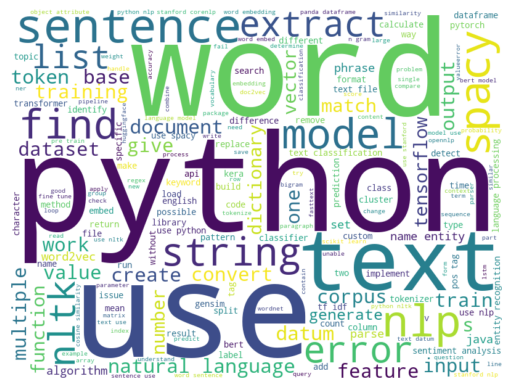

In [130]:
# generate wordcloud for the title in posts

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(word for word in data_1['cleaned_title'])
wordc = WordCloud(width = 800, height = 600, background_color='white').generate(text)
plt.figure()
plt.imshow(wordc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [153]:
# perform td-idf

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.85)
tfidf = vectorizer.fit_transform(data_1['cleaned_title'])

feature_names = vectorizer.get_feature_names_out()
idf_scores = vectorizer.idf_

# create a dictionary mapping each term to its IDF score.
idf_dict = dict(zip(feature_names, idf_scores))

# sort the terms based on the IDF scores (lowest first).
sorted_terms = sorted(idf_dict.items(), key=lambda item: item[1])
#print(sorted_terms)

# create custom stop words list to add those terms with low IDF score (threshold < 3.5)
custom_stop_words = []
for term, score in sorted_terms:
    if score <= 3.5:
        custom_stop_words.append(term)

# again perform stop word removal
def custom_stop_word_removal(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if word.lower() not in custom_stop_words]
    text = " ".join(text)
    return text

data_1['cleaned_title_x'] = data_1['cleaned_title'].apply(custom_stop_word_removal)

data_1
#print(data_1['cleaned_title_x'])

,Unnamed: 0,tags,a_id,q_id,date,link,title,body,view_count,answer,cleaned_text,cleaned_title,cleaned_title_x
0,77994129,"['nlp', 'label-studio']",NaN,77994129,1707912001,https://stackoverflow.com/questions/77994129/h...,How can I use label studio to annotate text da...,<p>How can I use label studio to annotate text...,725,NaN,use label studio annotate text datum google co...,use label studio annotate text data google colab,label studio annotate data google colab
1,75709831,"['python', 'deep-learning', 'pytorch', 'nlp', ...",NaN,75709831,1678572297,https://stackoverflow.com/questions/75709831/z...,Zero Accuracy in Sentiment Analysis FFNN Model...,<p>I'm constructing a feedforward neural net (...,125,NaN,zero accuracy sentiment analysis ffnn model py...,zero accuracy sentiment analysis ffnn model py...,zero accuracy sentiment analysis ffnn pytorch
2,79485259,"['python', 'nlp', 'spacy']",NaN,79485259,1741138463,https://stackoverflow.com/questions/79485259/s...,Spacy rules matching entities before text,<p>I'm trying to write a spacy parser to extra...,29,NaN,spacy rule match entity text try write spacy p...,spacy rule match entity text,spacy rule match entity
3,79501178,"['python', 'nlp', 'large-language-model']",79501337.0,79501178,1741704631,https://stackoverflow.com/questions/79501178/s...,Store images instead of showing in a server,<p>I am running the code found on this <a href...,35,<p>I can't test it but ...</p>\n<p>I checked <...,store image instead show server run code find ...,store image instead show server,store image instead show server
4,79548202,"['nlp', 'huggingface-transformers', 'pre-train...",79551169.0,79548202,1743499277,https://stackoverflow.com/questions/79548202/g...,GPT-2 and other models from huggingface -100 l...,<p>I understand the -100 label id is used so t...,43,<p>The author of the tutorial you mentioned se...,model huggingface label index training instead...,gpt2 model huggingface 100 label index trainin...,gpt2 huggingface 100 label index training inst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8168858,"['python', 'nlp', 'svm', 'orange']",8212397.0,8168858,1321540486,https://stackoverflow.com/questions/8168858/ho...,How to prepare text data for orange SVM train?,<p>I used NLTK classifiers 2 years ago. Now I ...,2175,<p>Short answer: No.</p>\n\n<p>Long answer: Th...,prepare text datum orange svm train nltk class...,prepare text datum orange svm train,prepare datum orange svm train
19996,8203025,"['ruby', 'linguistics', 'nlp']",8203077.0,8203025,1321807857,https://stackoverflow.com/questions/8203025/ap...,API to find Nouns in Sentence and Nearest Adje...,<p>I'm looking for an API or Ruby Gem that can...,1479,"<p>I don't know about Ruby, but to determine t...",api find noun sentence near adjective meaning ...,api find noun sentence nearest adjective meani...,api find noun sentence nearest adjective meani...
19997,7783916,"['java', 'nlp']",7794890.0,7783916,1318763931,https://stackoverflow.com/questions/7783916/fi...,Finding word collocations in Java,"<p>I am trying to find <a href=""http://nlp.sta...",2011,<p>For me the best ready to use algorithm for ...,find word collocation java try find collocatio...,find word collocation java,find collocation java
19998,8192455,"['python', 'nlp', 'machine-learning', 'nltk']",8193125.0,8192455,1321685544,https://stackoverflow.com/questions/8192455/nt...,"Ntlk &amp; Python, plotting ROC curve",<p>I am using nltk with Python and I would lik...,3008,"<p>PyROC looks simple enough: <a href=""http://...",ntlk python plot roc curve nltk python like pl...,ntlk python plot roc curve,ntlk plot roc curve


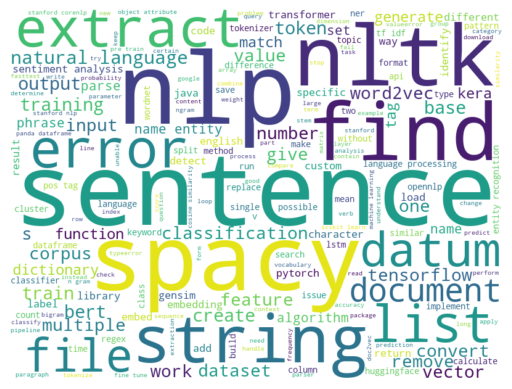

In [151]:
updated_text = " ".join(word for word in data_1['cleaned_title_x'])
updated_wordc = WordCloud(width = 800, height = 600, background_color='white').generate(updated_text)
plt.figure()
plt.imshow(updated_wordc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [155]:
# topic modelling - LDA

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

LDA_vectorizer = CountVectorizer(max_df=0.85)
LDA_tfidf = LDA_vectorizer.fit_transform(data_1['cleaned_text'])

lda = LatentDirichletAllocation(n_components=10)
lda.fit(LDA_tfidf)

feature_names = LDA_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")

Topic 0: search want find use natural user question nlp like language
Topic 1: code input try dataset datum bert use training train model
Topic 2: paragraph extract datum way time file article cluster text document
Topic 3: gensim similarity corpus gram embedding document matrix embed vector word
Topic 4: spacy file python work follow get run code try error
Topic 5: output dataframe like datum try code list text column file
Topic 6: model classifier dataset class sentiment classification text datum feature label
Topic 7: recognition example person spacy ner topic text extract name entity
Topic 8: like nltk parser spacy parse noun pos stanford tag sentence
Topic 9: way example find want text string like list sentence word


In [ ]:
# K-means clustering with tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

k_vectorizer = TfidfVectorizer(max_df=0.85)
k_tfidf = k_vectorizer.fit_transform(data_1['cleaned_text'])

# Set number of clusters (e.g., 5) and perform k-means clustering.
kmeans = KMeans(n_clusters=10)
kmeans.fit(k_tfidf)


# Extract cluster centers and find the top terms in each cluster.
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = k_vectorizer.get_feature_names_out()

for i in range(10):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {' '.join(top_terms)}")


Cluster 0: language natural processing english text nlp library use like python
Cluster 1: file text line error code try python read datum csv
Cluster 2: feature datum label text classification dataset training classifier model class
Cluster 3: column dataframe row panda text word datum like want frame
Cluster 4: error text code try like use spacy python nlp work
Cluster 5: model train error bert training try code load layer use
Cluster 6: vector word embed model embedding document train similarity sentence layer
Cluster 7: sentence word like parse text want example extract tag find
Cluster 8: list string word like python want text output try code
Cluster 9: word text list like want find document remove count example


### 4. Data Catergorisation

-	At first read some posts (the title and the accepted answers) from the dataset to plan how you want to categorise the posts (i.e., titles/questions). 
-	Identify posts that discussed about the issues and categorise them based on certain keywords and concepts. 
Suggestion: There are different ways to categorise the posts. Categorisation can be performed by identifying similar words between different posts.

### 5. References

date format in stack exchange API: 

https://api.stackexchange.com/docs/dates


convert UTC time to human readable time

https://stackoverflow.com/questions/4770297/convert-utc-datetime-string-to-local-datetime


create wordcloud in python

https://www.projectpro.io/recipes/create-word-cloud-python